In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
len(data)

20800

In [7]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
data.shape

(20800, 5)

In [9]:
## replacing the null values with empty string
data = data.fillna('')

In [10]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
column_names = data.columns
column_names


Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

## Combining the author and title allows us to discern whether the news is real or not
## merging the author column and title column to classify the news is real or not


In [12]:
data['content'] = data['author']+' '+data['title']

In [13]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [14]:
X = data.drop(columns='label', axis=1)
Y = data['label']

In [15]:
X.head()

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...


In [16]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [18]:
stemmer = PorterStemmer()

In [19]:
def clean(content):
    cleaned_content = re.sub('[^a-zA-Z]',' ',content)
    cleaned_content = cleaned_content.lower()
    cleaned_content = cleaned_content.split()
    cleaned_content = [stemmer.stem(word) for word in cleaned_content if not word in stopwords.words('english')]
    cleaned_content = ' '.join(cleaned_content)
    return cleaned_content
    

In [20]:
data['content'] = data['content'].apply(clean)

In [21]:
data['content'].head()

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
Name: content, dtype: object

In [22]:
## splitting the data 
X = data['content'].values
Y = data['label'].values

In [23]:
len(X)

20800

In [24]:
len(Y)

20800

In [25]:
## converting the textual data into numerical data 
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [27]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [28]:
## dividing the data into train and test data 
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.33, random_state=2)

## using different classification algorithms to measure the metrics of the model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
## Accuracy on training data
LR = LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression()

In [32]:
X_train_predict = LR.predict(X_train)
accuracy_X_train_logistic = accuracy_score(X_train_predict,Y_train)
accuracy_X_train_logistic

0.9862227324913893

In [33]:
X_test_predict = LR.predict(X_test)
accuracy_X_test_logistic = accuracy_score(X_test_predict,Y_test)
accuracy_X_test_logistic

0.9746503496503497

### RandomForest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [37]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [38]:
X_train_predict = RF.predict(X_train)
accuracy_X_train_RandomForest = accuracy_score(X_train_predict,Y_train)
accuracy_X_train_RandomForest

1.0

In [39]:
X_test_predict = RF.predict(X_test)
accuracy_X_test_RandomForest = accuracy_score(X_test_predict,Y_test)
accuracy_X_test_RandomForest

0.9912587412587412

## Support vector Machine

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [41]:
svm = SVC()
svm.fit(X_train,Y_train)

SVC()

In [42]:
X_train_predict = svm.predict(X_train)
accuracy_X_train_SupportVector = accuracy_score(X_train_predict,Y_train)
accuracy_X_train_SupportVector

0.9990671641791045

In [43]:
X_test_predict = svm.predict(X_test)
accuracy_X_test_SupportVector = accuracy_score(X_test_predict,Y_test)
accuracy_X_test_SupportVector

0.9857226107226107

## KNN classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [45]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [46]:
X_train_predict = KNN.predict(X_train)
accuracy_X_train_knn = accuracy_score(X_train_predict,Y_train)
accuracy_X_train_knn

0.5310706084959816

In [47]:
X_test_predict = KNN.predict(X_test)
accuracy_X_test_KNN = accuracy_score(X_test_predict,Y_test)
accuracy_X_test_KNN

0.5236013986013986

### Ploting the trainingdata accuracy score for different classification algorithms


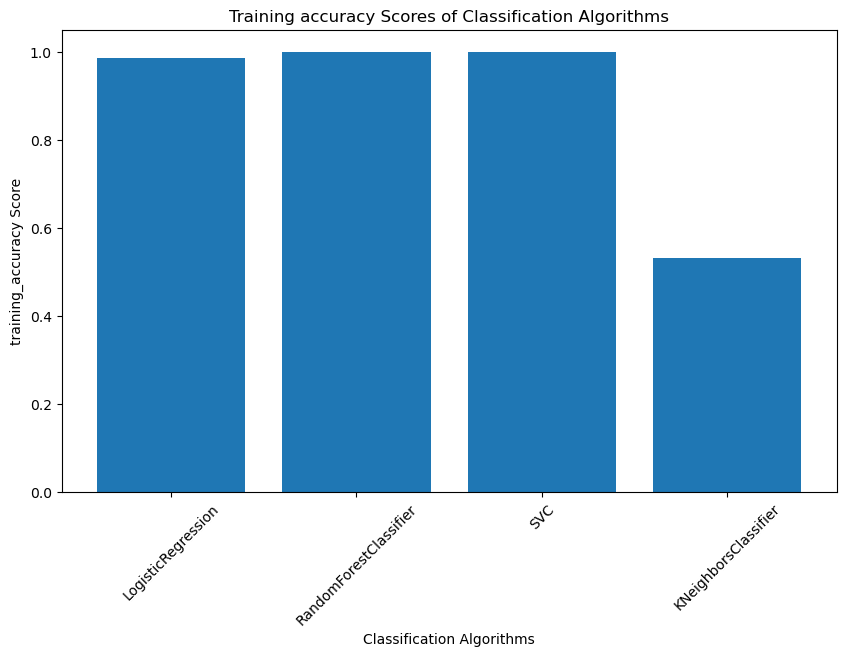

In [54]:
import matplotlib.pyplot as plt
train_accuracy_scores = {'LogisticRegression': 0.9862227324913893, 'RandomForestClassifier': 1.0, 'SVC': 0.9990671641791045,'KNeighborsClassifier': 0.5310706084959816}
plt.figure(figsize=(10, 6))
plt.bar(train_accuracy_scores.keys(), train_accuracy_scores.values())
plt.xlabel('Classification Algorithms')
plt.ylabel('training_accuracy Score')
plt.title('Training accuracy Scores of Classification Algorithms')
plt.xticks(rotation=45)
plt.show()


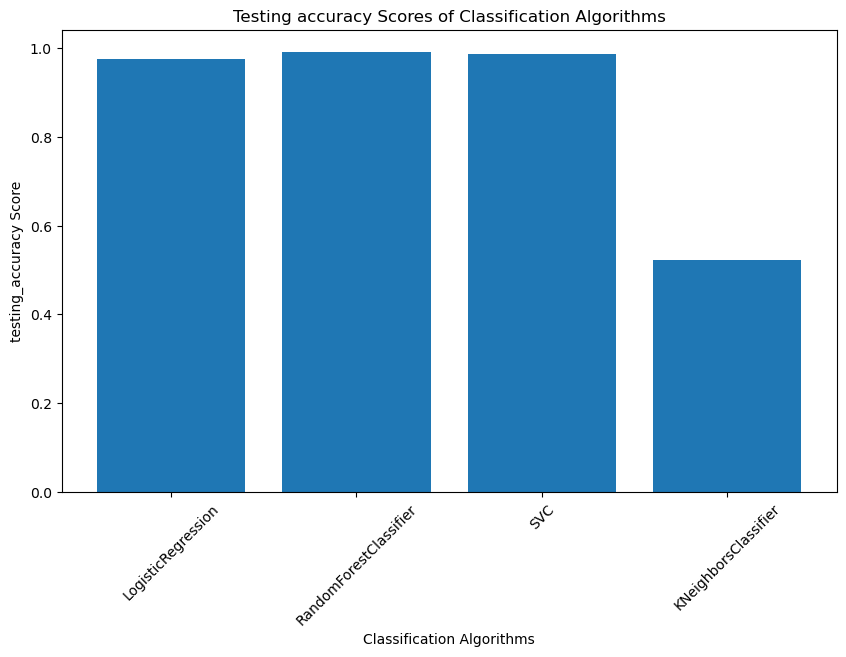

In [55]:
import matplotlib.pyplot as plt
test_accuracy_scores = {'LogisticRegression': 0.9746503496503497, 'RandomForestClassifier': 0.9912587412587412, 'SVC': 0.9857226107226107,'KNeighborsClassifier':0.5236013986013986}
plt.figure(figsize=(10, 6))
plt.bar(test_accuracy_scores.keys(), test_accuracy_scores.values())
plt.xlabel('Classification Algorithms')
plt.ylabel('testing_accuracy Score')
plt.title('Testing accuracy Scores of Classification Algorithms')
plt.xticks(rotation=45)
plt.show()
